# Step1: Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', '{:.1f}'.format)

# Step2: Loading the dataset

In [2]:
df = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")

# Step3: EDA

In [3]:
#reading first 10 rows of the data
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
#data types in the data
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [5]:
#null values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
#statistical measures
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.0,918.0,918.0,918.0,918.0,918.0,918.0
mean,53.5,132.4,198.8,0.2,136.8,0.9,0.6
std,9.4,18.5,109.4,0.4,25.5,1.1,0.5
min,28.0,0.0,0.0,0.0,60.0,-2.6,0.0
25%,47.0,120.0,173.2,0.0,120.0,0.0,0.0
50%,54.0,130.0,223.0,0.0,138.0,0.6,1.0
75%,60.0,140.0,267.0,0.0,156.0,1.5,1.0
max,77.0,200.0,603.0,1.0,202.0,6.2,1.0


In [8]:
#shape of the data
df.shape

(918, 12)

In [9]:
#duplicated lines
df.duplicated().sum()

0

In [10]:
#check if the target is imbalanced 
df["HeartDisease"].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [11]:
#unique values of categorical features
print(df["Sex"].unique())
print(df["ExerciseAngina"].unique())
print(df["ChestPainType"].unique())
print(df["RestingECG"].unique())
print(df["ST_Slope"].unique())
print(df["FastingBS"].unique())
print(df["HeartDisease"].unique())

['M' 'F']
['N' 'Y']
['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['Up' 'Flat' 'Down']
[0 1]
[0 1]


In [12]:
#correlation between the numerical columns
numerical_columns = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
df[numerical_columns].corr()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
Age,1.0,0.3,-0.1,-0.4,0.3
RestingBP,0.3,1.0,0.1,-0.1,0.2
Cholesterol,-0.1,0.1,1.0,0.2,0.1
MaxHR,-0.4,-0.1,0.2,1.0,-0.2
Oldpeak,0.3,0.2,0.1,-0.2,1.0


<Axes: >

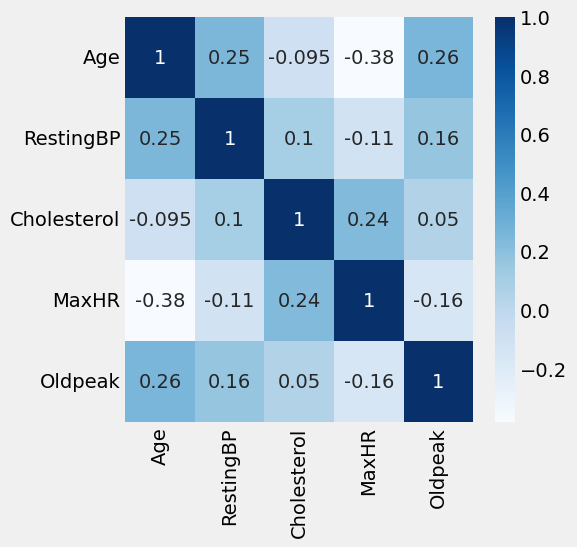

In [13]:
#heatmap for clear image of correlation
plt.figure(figsize = (5, 5))
sns.heatmap(df[numerical_columns].corr(), annot = True, cbar = True, cmap = "Blues")

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

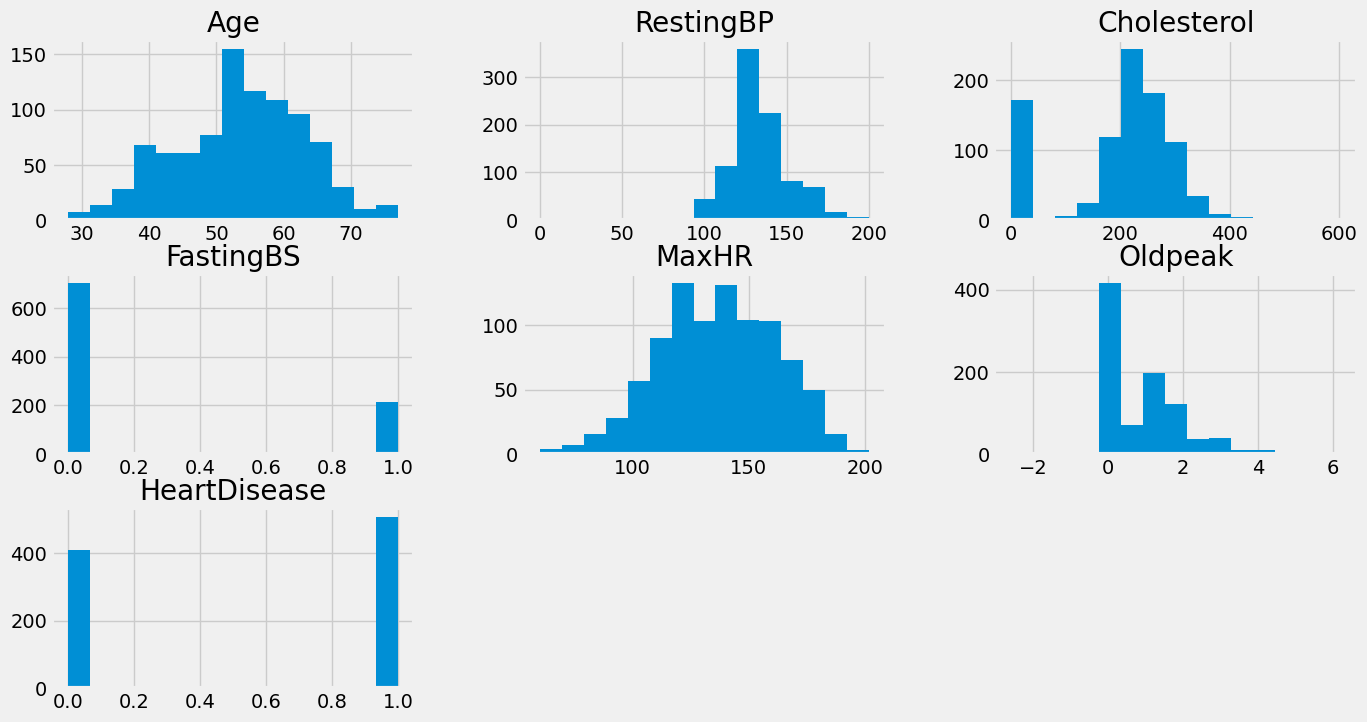

In [14]:
#histograms for all the data
df.hist(bins = 15, figsize = (15, 8))

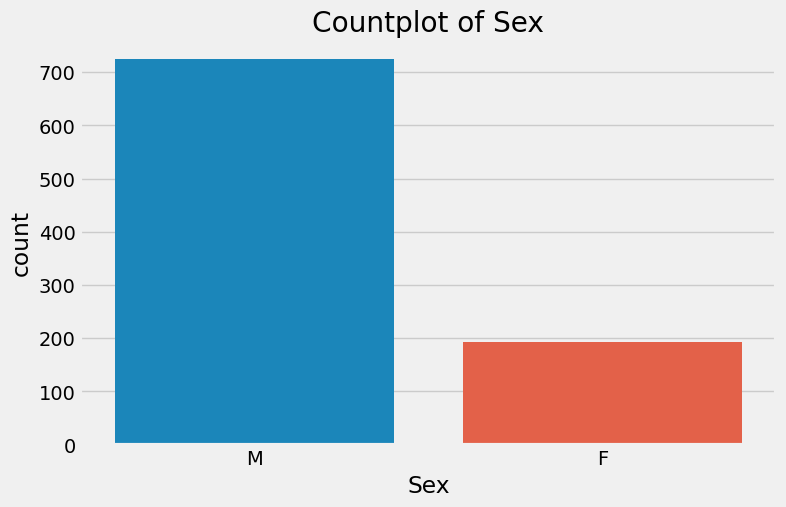

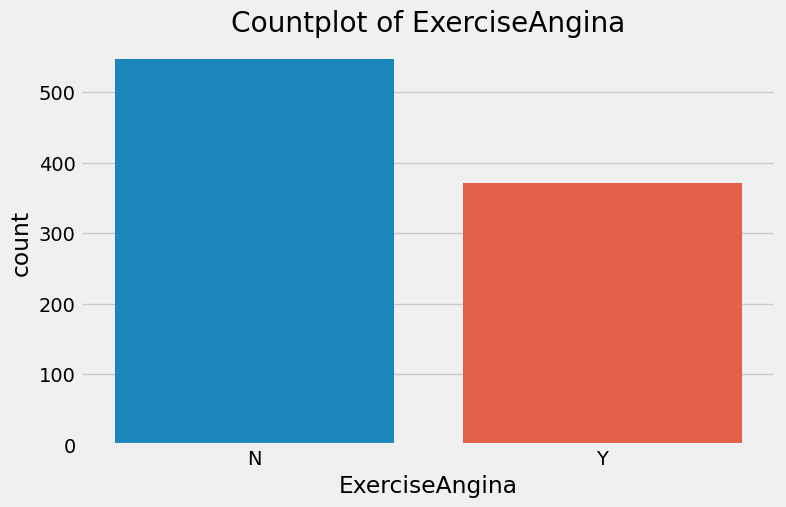

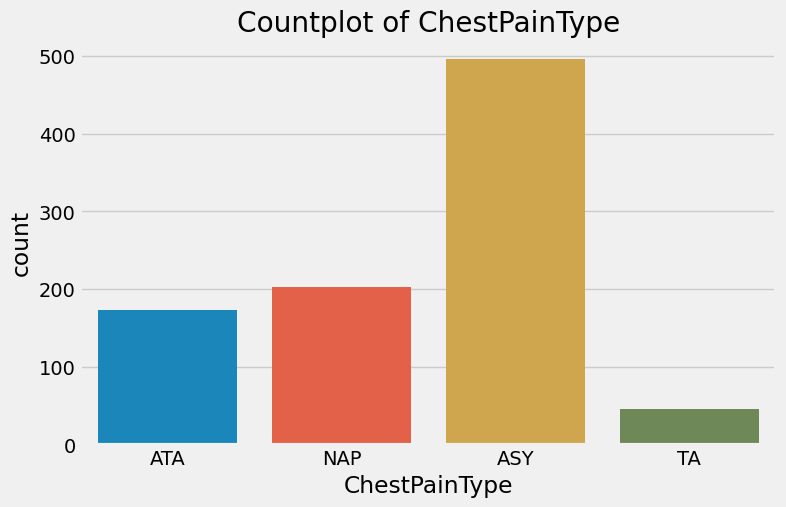

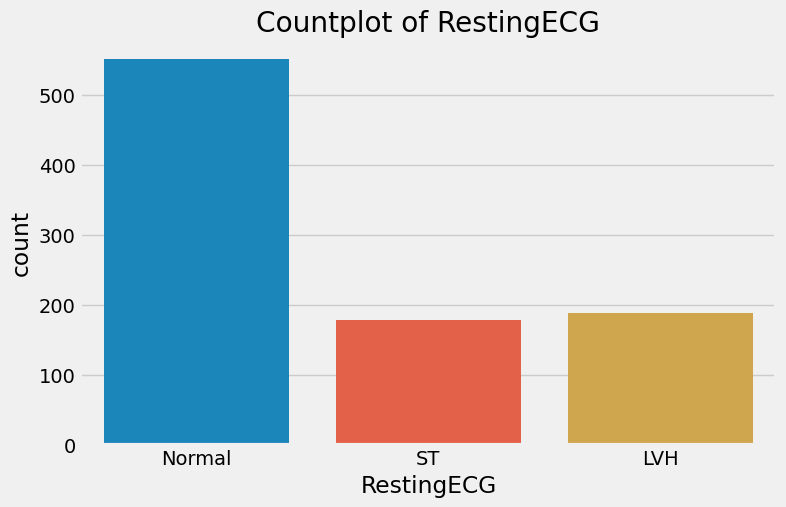

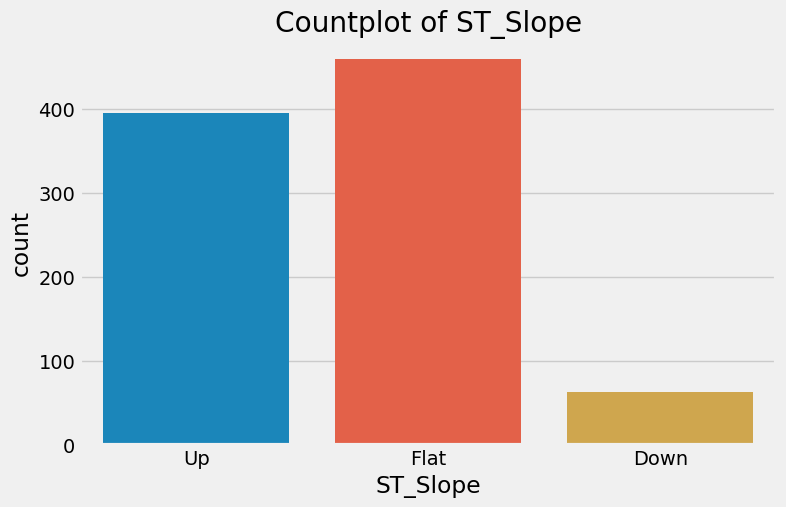

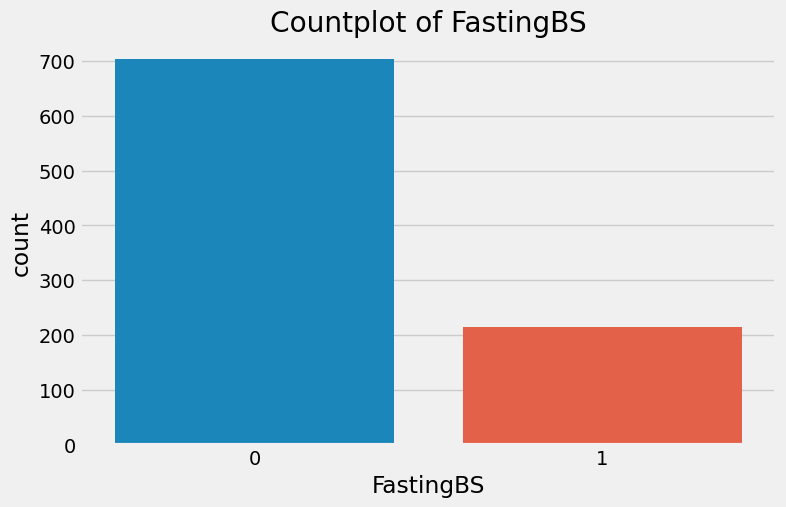

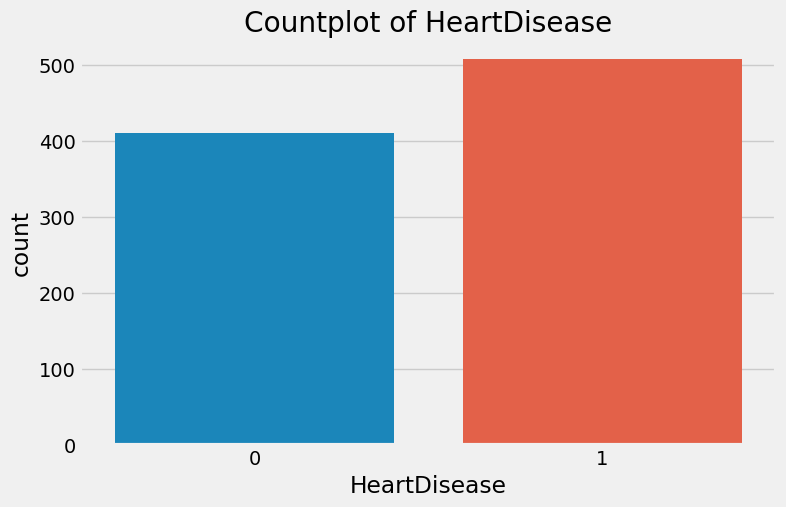

In [15]:
#countplots for caategorical columns
categorical_columns = ["Sex", "ExerciseAngina", "ChestPainType", "RestingECG", "ST_Slope", "FastingBS", "HeartDisease"]
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')
    plt.show()

# Step4: Data Preprocessing

In [16]:
#preprocessing function
def preprocessing(data):
    data=data.copy()
    
    #encoding categorical features
    label_encoder = LabelEncoder()
    for column in ["Sex", "ExerciseAngina", "ChestPainType", "RestingECG", "ST_Slope"]:
        data[column] = label_encoder.fit_transform(data[column])
    
    #splitting data to train and test
    x = data.drop("HeartDisease", axis = 1)
    y = data["HeartDisease"]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 42)
    
    #scaling
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    return x_train, x_test, y_train, y_test

In [17]:
X_train, X_test, y_train, y_test = preprocessing(df)

# Step5: Modelling

In [18]:
#all models we will apply
models= {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "XGBoost": xgb.XGBClassifier(),
}

#applying the models and Classification Reports
for name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model) 
    
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy:.2f}\n")
    print(classification_report(y_test, y_pred))
    print("="*50)  # Separating lines for better readability

Logistic Regression: Accuracy = 0.85

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Decision Tree: Accuracy = 0.82

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        77
           1       0.88      0.79      0.83       107

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.82      0.82      0.82       184

Random Forest: Accuracy = 0.89

              precision    recall  f1-score   support

           0       0.85      0.90      0.87        77
           1       0.92      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.89   